In [2]:
import matplotlib.pyplot as plt
import random
from itertools import product
from fractions import Fraction

# Почему нет графиков
Графиков нет, потому что чтобы нарисовать для 7-ми кубиков надо иметь семимерное пространство

In [3]:
def uni_graph(func, *args, test_count=5000):
    c = 0
    for _ in range(test_count):
        res, x, y = func(*args)
        plt.plot(x, y, marker='.', markersize=1, color='rg'[res])

        if res:
            c += 1
        print(c/test_count)

In [4]:
def graph(func, *args, test_count=1_000_000):
    random.seed(1223)
    results = [0]

    for _ in range(test_count):
        res = func(*args)
        results.append(res + results[-1])

    results = [el / (n+1) for n, el in enumerate(results[1:])]

    mean = sum(results)/test_count
    s = results[test_count//50:]
    k = max(s) - min(s)
    plt.ylim(mean-k, mean+k)

    real_mean = sum(results[test_count//20:]) / (test_count//20*19)

    plt.plot(results)
    plt.plot([0, test_count], [real_mean, real_mean])

    return real_mean


0.578021810894645

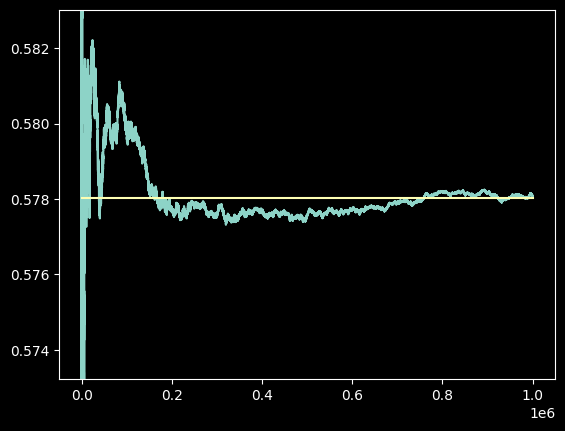

In [5]:
def library():
    if random.randint(0, 1):
        if random.randint(0, 1):
            return True

def is_find():
    return any(library() for _ in range(3))

graph(is_find)
        

---
## 5.2
Найти вероятность того, что при бросании трех игральных костей хотя бы на одной выпадет 6 очков, при условии, что на всех костях выпали грани с четным числом очков.

0.7029979836061296

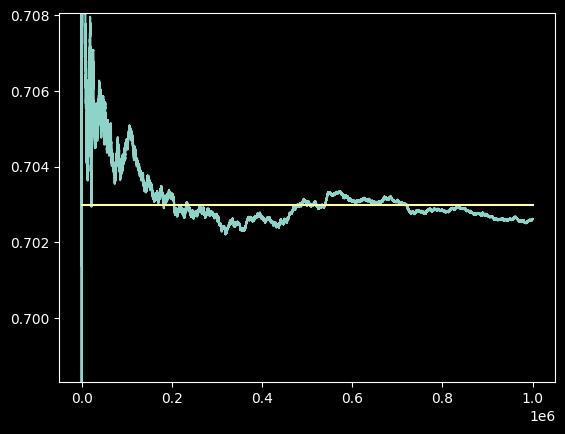

In [6]:
def dices():
    return 6 in [random.choice((2, 4, 6)) for _ in '111']

graph(dices)

---
## 5.6
Брошено две игральных кости.\
Предполагается, что все комбинации выпавших очков равновероятны.\
Найти условную вероятность того, что выпали две пятерки, если известно, что сумма выпавших очков делится на пять.

0.143193115880633

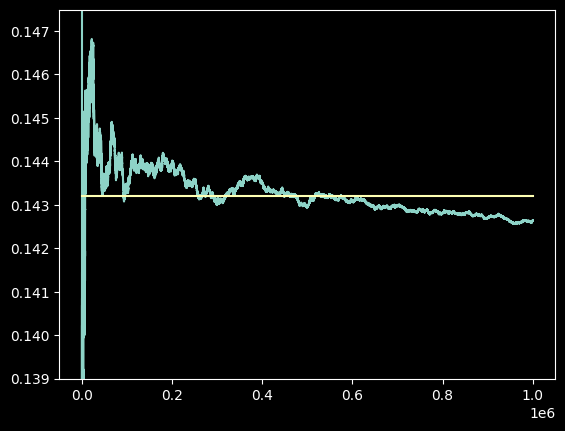

In [7]:
couples = [i for i in product(range(1, 7), repeat=2) if sum(i) % 5 == 0]

def dices2():
    return random.choice(couples) == (5, 5)

graph(dices2)

---
## 5.7
Бросаются три игральные кости. Какова вероятность того, что на одной из них выпадет единица, если на всех трех костях выпали разные грани?

0.5001681164361772

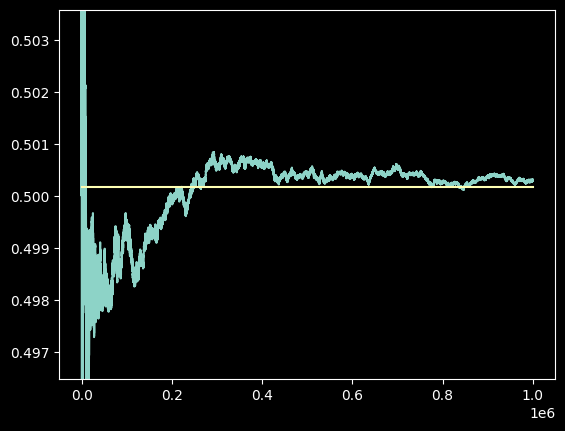

In [8]:
def test():
    return 1 in random.sample((1,2,3,4,5,6), 3)
graph(test)

---
## 5.8
Из 100 карточек с числами $0; 1; 2; \dots ; 98; 99$ случайно выбирается одна.\
Пусть Х и У соответственно сумма и произведение цифр на выбранной карточке.\
Найти условную вероятность события $Р(Х=i|Y=0),i=0;1;2;\dots;18$

0.0526123124594733

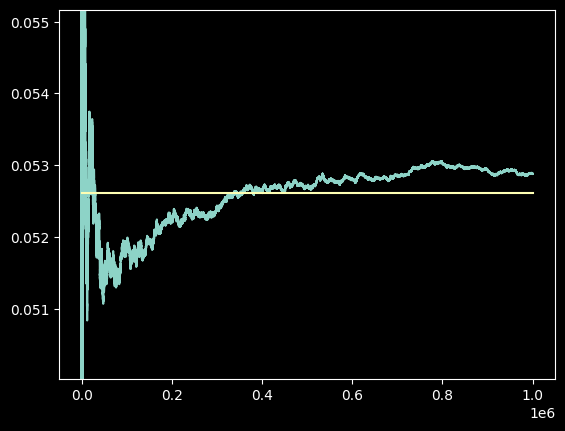

In [9]:
def card(i=1):
    Y = 1
    while Y != 0:
        num = random.randint(0, 99)
        # Произведение
        Y = (num % 10) * (num // 10)
    # Сумма
    X = (num % 10) + (num // 10)
    return X == i

graph(card, 0)

0.10493618903757287

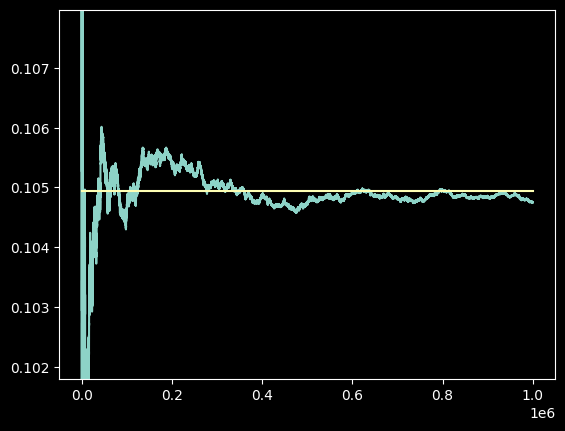

In [10]:
graph(card, 1)

C:\Users\DaSh-More\AppData\Local\Temp\ipykernel_348\1389493531.py:14: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(mean-k, mean+k)


0.0

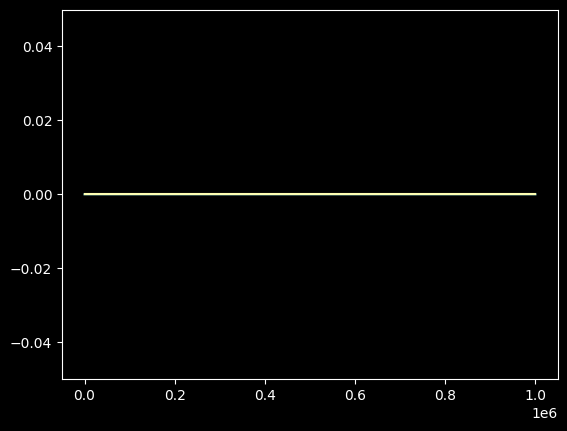

In [11]:
graph(card, 11)

---
## 5.9
Известно, что при бросании 10 игральных костей появилась по крайней мере одна единица.\
Какова вероятность, что появились две или более единицы?

0.6157690075348008

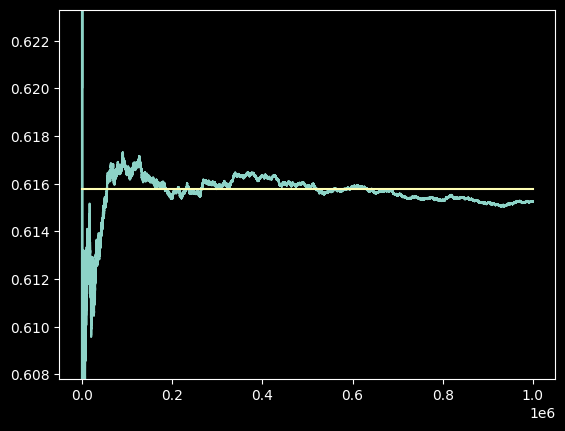

In [12]:
def dice3():
    a = [random.randint(1, 6) for _ in range(10)]
    while 1 not in a:
        a = [random.randint(1, 6) for _ in range(10)]
    return a.count(1) >= 2

graph(dice3)


---
## 5.10
Восемь различных книг расставлены наудачу на одной полке. Найти вероятность, что две определенные книги окажутся на первых двух местах, если известно, что они стоят рядом.

0.14265915604634474

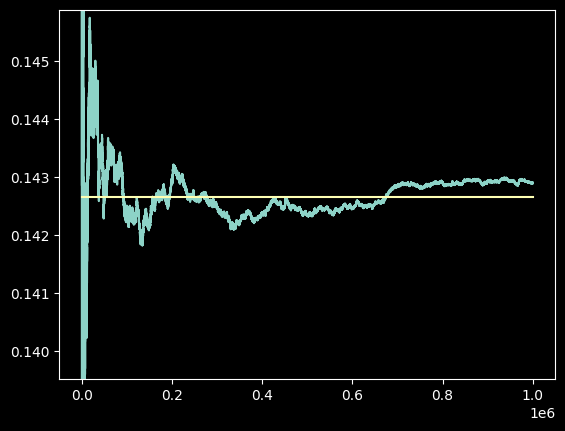

In [13]:
a = list(map(str, range(8)))
def test():
    random.shuffle(a)
    while not ('01' in ''.join(a) or '10' in ''.join(a)):
        random.shuffle(a)
    return ''.join(a[:2]) in ('010')

# test()
graph(test)

In [14]:
# 11

15

In [ ]:
# 12

In [17]:
import random


0.11245548738643849

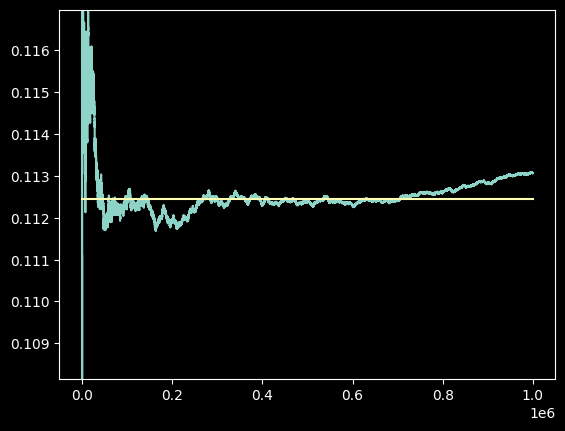

In [18]:
# 13
graph(lambda: len(set(random.choices(range(4, 13), k=6))) == 6)


0.0015767757562691316

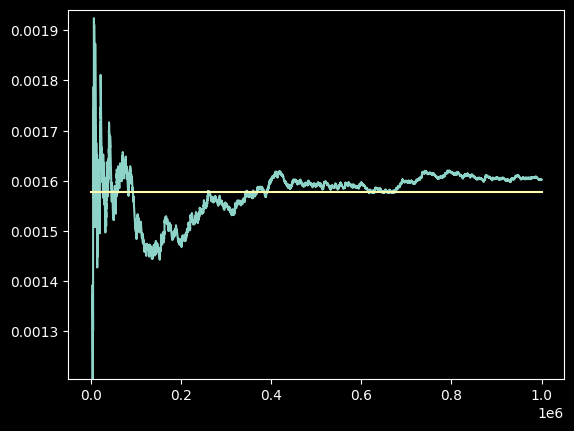

In [22]:
# 14
def func():
    while True:
        k = random.choices(range(4), k=6)
        if len(set(k)) < 4:
            break
    
    if len(set(k)) == 1:
        return True
    return False
    

graph(func)


0.8340737950765518

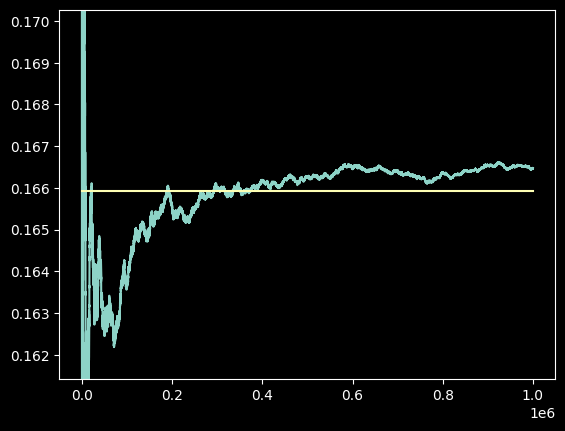

In [39]:
# 15


def dice():
    while random.randint(1, 6) != 1:
        ...
    return random.randint(1, 6) == 1

1 - graph(dice)

True

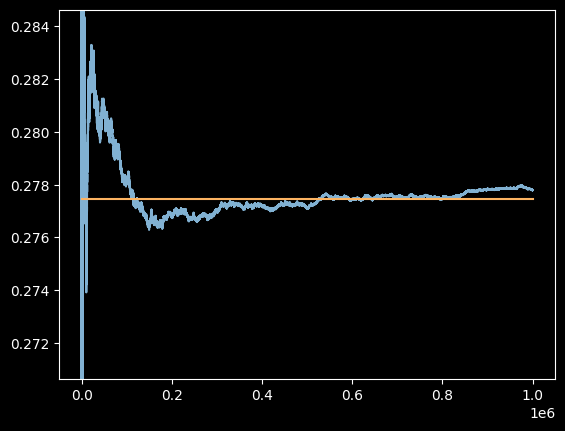

In [41]:
# 16

def A():
    i, j = random.randint(1, 6), random.randint(1, 6)
    return i % j == 0


def B():
    i, j = random.randint(1, 6), random.randint(1, 6)
    return (i + j) % 2 == 0


def AB():
    i, j = random.randint(1, 6), random.randint(1, 6)
    return (i + j) % 2 == i % j == 0

a = graph(A)
b = graph(B)
ab = graph(AB)
a * b - ab < 0.001


0.5001894746260528

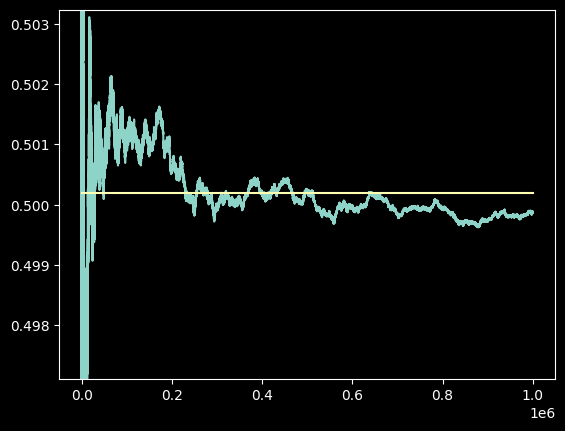

In [35]:
# 18
def f1():
    return bool([random.randint(1,2) for i in range(6)].count(1) % 2)

def f2():
    while True:
        k = [random.randint(1, 2) for i in range(6)]
        if k.count(1) >= 5:
            break
    return bool([random.randint(1, 2) for i in range(6)].count(1) % 2)

graph(f1)


0.4997691722584423

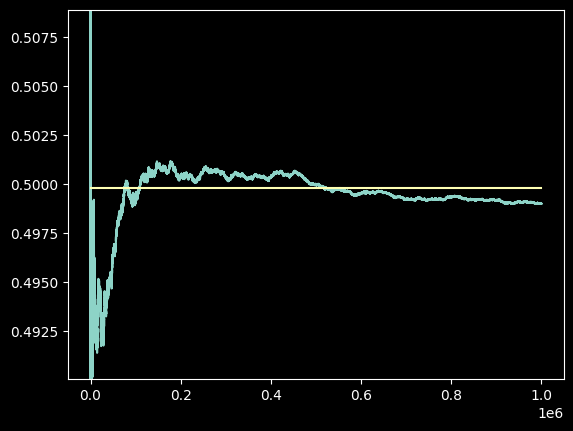

In [36]:
graph(f2)

In [ ]:
# 19
def A1(a=0, b=0):
    if a == 0 or b == 0:
        a, b = random.randint(1, 6), random.randint(1, 6)

def A2(a=0, b=0):
    if a == 0 or b == 0:
        a, b = random.randint(1, 6), random.randint(1, 6)
    



In [53]:
from itertools import combinations_with_replacement as cwr, combinations

In [74]:
class Dice(list):
    def __init__(self, points:list=[1,2,3,4,5,6]):
        super().__init__(points)

    def __and__(self, other):
        ...
    
    def __or__(self, other):
        ...
    
    def __truediv__(self, other):
        return Dice([i for i in self if i % other == 0])
    
    def __list__(self):
        return self.points

    def __add__(self, other):
        if isinstance(other, Dice):
            return Dice([x + y for x in self for y in other])

    

(Dice() + Dice()) / 2


[2, 4, 6, 4, 6, 8, 4, 6, 8, 6, 8, 10, 6, 8, 10, 8, 10, 12]